# Demo of pyGPs#

Here, we demonstrate a short program to show how to use the pyGPs-package for regression tasks.

In [4]:
import numpy as np
import pyGPs

We are generating data by taking evenly spaced values between -5 and 5 as our set of points X. 
For our respective set of points Y we are generating Gaussian-distributed values with a parabola shaped mean and an RBF Kernel 
with an added error term as our covariance.

In [16]:
X = np.arange(-5, 5, 0.2)
s = 1e-8                                                     # error term                                                                             
n = X.size
m = 1/4*np.square(X)                                         # mean
a = np.repeat(X, n).reshape(n, n)
k = np.exp(-0.5*(a - a.transpose())**2) + s*np.identity(n)   # covariance  
Y = np.random.multivariate_normal(m, k, 1)
Y = Y.reshape(n)                                             # Converting y from a 
                                                             # matrix to an array

We treat the values $x \in X$ (whilst $X \subseteq \mathbb{R}$) as our input points and the values $y \in Y$ ($Y \subseteq \mathbb{R}$) as corresponding output points. 
Handing this over to our model variable as data, we can use pyGPs' Gaussian Process Regression (With a zero mean, an RBF Kernel and Gaussian likelihood as default). 

Note, that we're using a zero mean Gaussian Process prior for our data, which has been generated by a parabola-shaped mean Gaussian. This shows the flexibility of the model.

Using this, we can predict output values for values of x outside of our initial range between -5 and 5.

Number of line searches 40


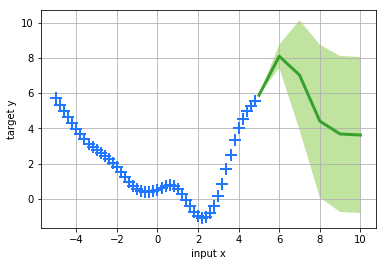

In [17]:
model = pyGPs.GPR()
model.setData(X,Y)
# model.setPrior(mean=pyGPs.mean.Zero(), kernel=pyGPs.cov.RBF()) is redundant
model.optimize(X,Y)                                            
model.predict(np.array([5,6,7,8,9,10]))
model.plot()